# Business Problem Understanding

## Context
Olist adalah sebuah perusahaan yang mengintegrasikan pasar e-commerce di Brasil. Olist menyediakan platform yang memungkinkan penjualan langsung di berbagai situs e-commerce di negara Brasil. Dengan platform ini, pengusaha dapat terhubung dengan pengecer besar serta memudahkan pemilik toko untuk beriklan dan menjual produk mereka. Hal ini membantu perusahaan ritel menjangkau pasar yang lebih luas, meningkatkan pengalaman belanja, dan mengubah perilaku pembelian. Olist menghubungkan bisnis kecil dari seluruh Brasil dengan saluran penjualan yang efisien, memungkinkan pedagang untuk menjual produk melalui Olist dan mengirimkannya langsung kepada pelanggan menggunakan mitra logistik Olist.




## Problem Statement

Perusahaan bermaksud melakukan analisis menyeluruh untuk memahami perilaku pelanggan pada platform e-commerce mereka. Dalam upaya meningkatkan kinerja bisnis, Olist Store ingin menganalisis data yang telah terkumpul secara mendalam. Tujuan utama Olist Store adalah untuk melihat *customer behavior* berdasarkan data, yang nantinya diharapkan dapat meningkatkan pengalaman pelanggan. Selain itu perusahaan juga ingin menganalisis churn pelanggan, agar nantinya secara keseluruhan meningkatkan kinerja bisnis.

Perusahaan ingin mengetahui pelanggan mana saja yang berpotensi akan *churn*, yaitu pelanggan yang kemungkinan besar akan berhenti menggunakan/bertransaksi di Olist. Hal ini penting untuk diketahui karena *churn rate* yang tinggi tidak baik bagi perusahaan. Mempertahankan pelanggan yang sudah ada lebih menguntungkan dibandingkan perlu menambah pelanggan baru (cr: [HBR](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)).

Perusahaan akan menerapkan sebuah metode promosi khusus bagi pelanggan yang berpotensi akan churn. Agar budget yang tersedia dapat digunakan lebih efektif, maka sebaiknya pelanggan yang diberikan metode promosi ini hanya pelanggan yang berpotensi churn saja. Meskipun jika pelanggan yang tidak berpotensi churn pun diberikan promosi dapat memberikan dampak positif berupa satisfaction/loyalty yang meningkat (cr: [NSU Dissertation](https://core.ac.uk/reader/51097630)), tetapi *concern* utama perusahaan adalah pelanggan-pelanggan yang berpotensi tinggi untuk *churn*.

## Goals

1. Memahami pola perilaku pelanggan: Menganalisis interaksi pelanggan, preferensi, dan perilaku pembelian di platform e-commerce Olist. Diharapkan dengan lebbih memahami pola perilaku pelanggan, perusahaan dapat meningkatkan pengalaman pelanggan secara keseluruhan dengan mengidentifikasi area-area untuk peningkatan kepuasan pelanggan, dan menyesuaikan layanan untuk memenuhi kebutuhan dan preferensi pelanggan.
2. Menganalisis churn pelanggan: Meneliti faktor-faktor yang menyebabkan churn pelanggan, seperti ketidakpuasan, harga, atau kualitas layanan, dan mengembangkan strategi untuk mengurangi tingkat churn.

Dengan memanfaatkan wawasan yang diperoleh dari analisis data untuk mengoptimalkan strategi pemasaran, penawaran produk, dan proses operasional untuk meningkatkan pertumbuhan pendapatan dan profitabilitas bagi Olist Store dapat meningkatkan kinerja bisnis secara keseluruhan.


## Analytic Approach

Analisis Data: Menggunakan analisis statistik, algoritma pembelajaran mesin, dan teknik visualisasi data untuk mengeksplorasi pola, tren, dan korelasi dalam data agar dapat memperoleh *insight* mengenai pola perilaku pelanggan.

Prediksi Churn: Mengembangkan model prediktif untuk mengidentifikasi pelanggan yang berisiko churn dan menerapkan strategi retensi yang sesuai terhadap target.


<img src="matrix.png.png"/>

Type 1 error: False Positive\
Konsekuensi: Promosi diberikan pada pelanggan yang salah, berpotensi membuang resources

Type 2 error: False Negative\
Konsekuensi: Pelanggan yang berpeluang tinggi akan churn tidak diberikan promosi yang sesuai sehingga tetap churn

Kembali pada tujuan awal dibuatnya model, yaitu untuk mengetahui pelanggan mana yang akan churn, maka yang akan dilakukan adalah memastikan model dapat mengetahui pelanggan mana saja yang berpeluang churn agar perusahaan dapat memberikan promosi yang tepat. Maka sebisa mungkin hindari terjadinya type 2 error. Namun bukan berarti type 1 error dapat diabaikan begitu saja, karena jika terlalu banyak type 1 error pun dapat merugikan perusahaan. Resources yang seharusnya digunakan untuk pelanggan yang akan churn malah diarahkan ke pelanggan yang salah. Maka dari itu, metric utama yang dapat digunakan adalah F1-Score. Selain itu F1-Score juga baik digunakan jika data yang digunakan imbalanced.

# Data Understanding

Sumber dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=product_category_name_translation.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('font', family='Calibri')
mpl.rc('axes', unicode_minus=False)

In [2]:
# plot functions
def format_spines(ax, right_border=True):
    """
    this function sets up borders from an axis and personalize colors
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """
    this function plots data setting up frequency and percentage in a count plot;
    this also sets up borders and personalization
    """    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()

def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    """
    this function plots data setting up frequency and percentage in a bar plot; 
    this algo sets up borders and personalization
    """
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=13, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()
    
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    this function computes working days between two date columns in a dataframe
    """
    # Computing difference between dates
    time_list = []
    idx = 0
    dates = df[date_col1].values.astype('datetime64[D]')
    second_dates = df[date_col2].values.astype('datetime64[D]')
    for date in dates:
        second_date = second_dates[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adding to a dataframe and dropping null values
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

def communicate_params(frete, entrega, estimativa):
    """
    this function assists the analysis by customer state and plots usefull information
    in the first row of an axis
    """
    # Communicating mean freight value
    axs[0, 0].text(0.5, 0.12, str(f'Mean Freight Value \nR${frete:.2f}'),
                   fontsize=13, ha='center')
    axs[0, 0].axis('off')
    
    # Communicating mean delivery time
    axs[0, 1].text(0.5, 0.12, 
                   str(f'Mean Delivery Time \n{int(entrega)} working days.'),
                   fontsize=13, ha='center')
    axs[0, 1].axis('off')
    
    # Communicating difference between delivery time and estimated time
    if mean_diff_estimative > 0:
        inf = 'before'
    else:
        inf = 'after'
    text_diff_estimative = f'On average, orders are delivered \n{int(estimativa)} \
working days \n{inf} estimated time.'
    axs[0, 2].text(0.5, 0.10, 
                   str(text_diff_estimative), fontsize=13, ha='center')
    axs[0, 2].axis('off')
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False):
    """
    this function is used to answear comparative questions in plots (top 5 and last 5)
    """
    # Setting up axis
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # First step: plotting top 5 from an attribute
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    
    # Second step: plotting last 5 from an attribute
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Higher', 'Lower'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)

In [3]:
# Reading all datasets
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
df_translations = pd.read_csv('data/product_category_name_translation.csv')

In [4]:
dataframes = {
    'Customers': df_customers,
    'Geolocation': df_geolocation,
    'Orders': df_orders,
    'Items': df_items,
    'Payments': df_payments,
    'Reviews': df_reviews,
    'Products': df_products,
    'Sellers': df_sellers
}

for df_name, df in dataframes.items():
    print(f'{df_name}')
    print(f'{list(df.columns)}\n')

Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_wid

## Data Cleaning

In [5]:
# Counting null data in datasets with True results in task above
for df_name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {df_name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



Data yang *null* pada dataset orders yaitu:

- Pesanan tanpa `order_approved_at`, berarti tidak ada tanggal pembayaran pesanan telah disetujui;
- Tanpa `order_delivered_carrier_date` berarti tidak ada tanggal pesanan telah diberikan pada pihak logistik;
- Tanpa `order_delivered_customer_date` berarti tidak ada tanggal pesanan telah diterima pelanggan.

Data yang *Null* pada data Reviews yaitu:
- Review tanpa judul;
- Review tanpa komentar.

Data yang *Null* pada data Products yaitu:
- Produk tanpa nama, kategori, tanpa deskripsi, tanpa foto, dan tanpa detail dimensi.

In [6]:
# Data type
for df_name, df in dataframes.items():
    print(f'Dataset: {df_name}\n')
    print(f'{df.dtypes}\n')

Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Geolocation

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Dataset: Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataset: Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
frei

In [7]:
# Change columns to datetime in orders dataset
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Data type
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

# EDA

## Sales

In [8]:
lists = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for cols in lists:
    df_orders[cols] = pd.to_datetime(df_orders[cols])  
    
# Purchase Year
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].dt.year

# Purchase Month
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].dt.month

# Purchase Day of Week
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].dt.dayofweek


In [9]:
print(f'First observation was in: {df_orders["order_purchase_timestamp"].min()}')
print(f'Last observation was in: {df_orders["order_purchase_timestamp"].max()}')

First observation was in: 2016-09-04 21:15:19
Last observation was in: 2018-10-17 17:30:18


In [10]:
# Merging items dataset
df_orders_items = df_orders.merge(df_items, on='order_id', how='inner')

# Creating new column with item value + freight value
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_sales
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,1,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,5,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,1,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62


In [11]:
# Grouping by annual and monthly sales
df_sales = df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).agg({'total_sales': 'sum'}).loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [12]:
# Define a function to fill missing months in a DataFrame
def fill_missing_months(df, year):
    # Create a DataFrame with all months in the year
    all_months = pd.DataFrame({'order_purchase_month': np.arange(1, 13)})
    
    # Merge the DataFrame with all months with the original DataFrame
    merged_df = pd.merge(all_months, df, on='order_purchase_month', how='left')
    
    # Fill missing values (NaN) in 'total_sales' column with 0
    merged_df['total_sales'] = merged_df['total_sales'].fillna(0)
    
    # Add 'order_purchase_year' column
    merged_df['order_purchase_year'] = year
    
    return merged_df.astype(int)

# Assuming df_sales_2016, df_sales_2017, and df_sales_2018 are DataFrames for each year
grouped_dfs = [df_sales_2016, df_sales_2017, df_sales_2018]
years = [2016, 2017, 2018]

# Fill missing months for each DataFrame
filled_dfs = [fill_missing_months(df, year) for df, year in zip(grouped_dfs, years)]

# Update the original DataFrames
df_sales_2016, df_sales_2017, df_sales_2018 = filled_dfs

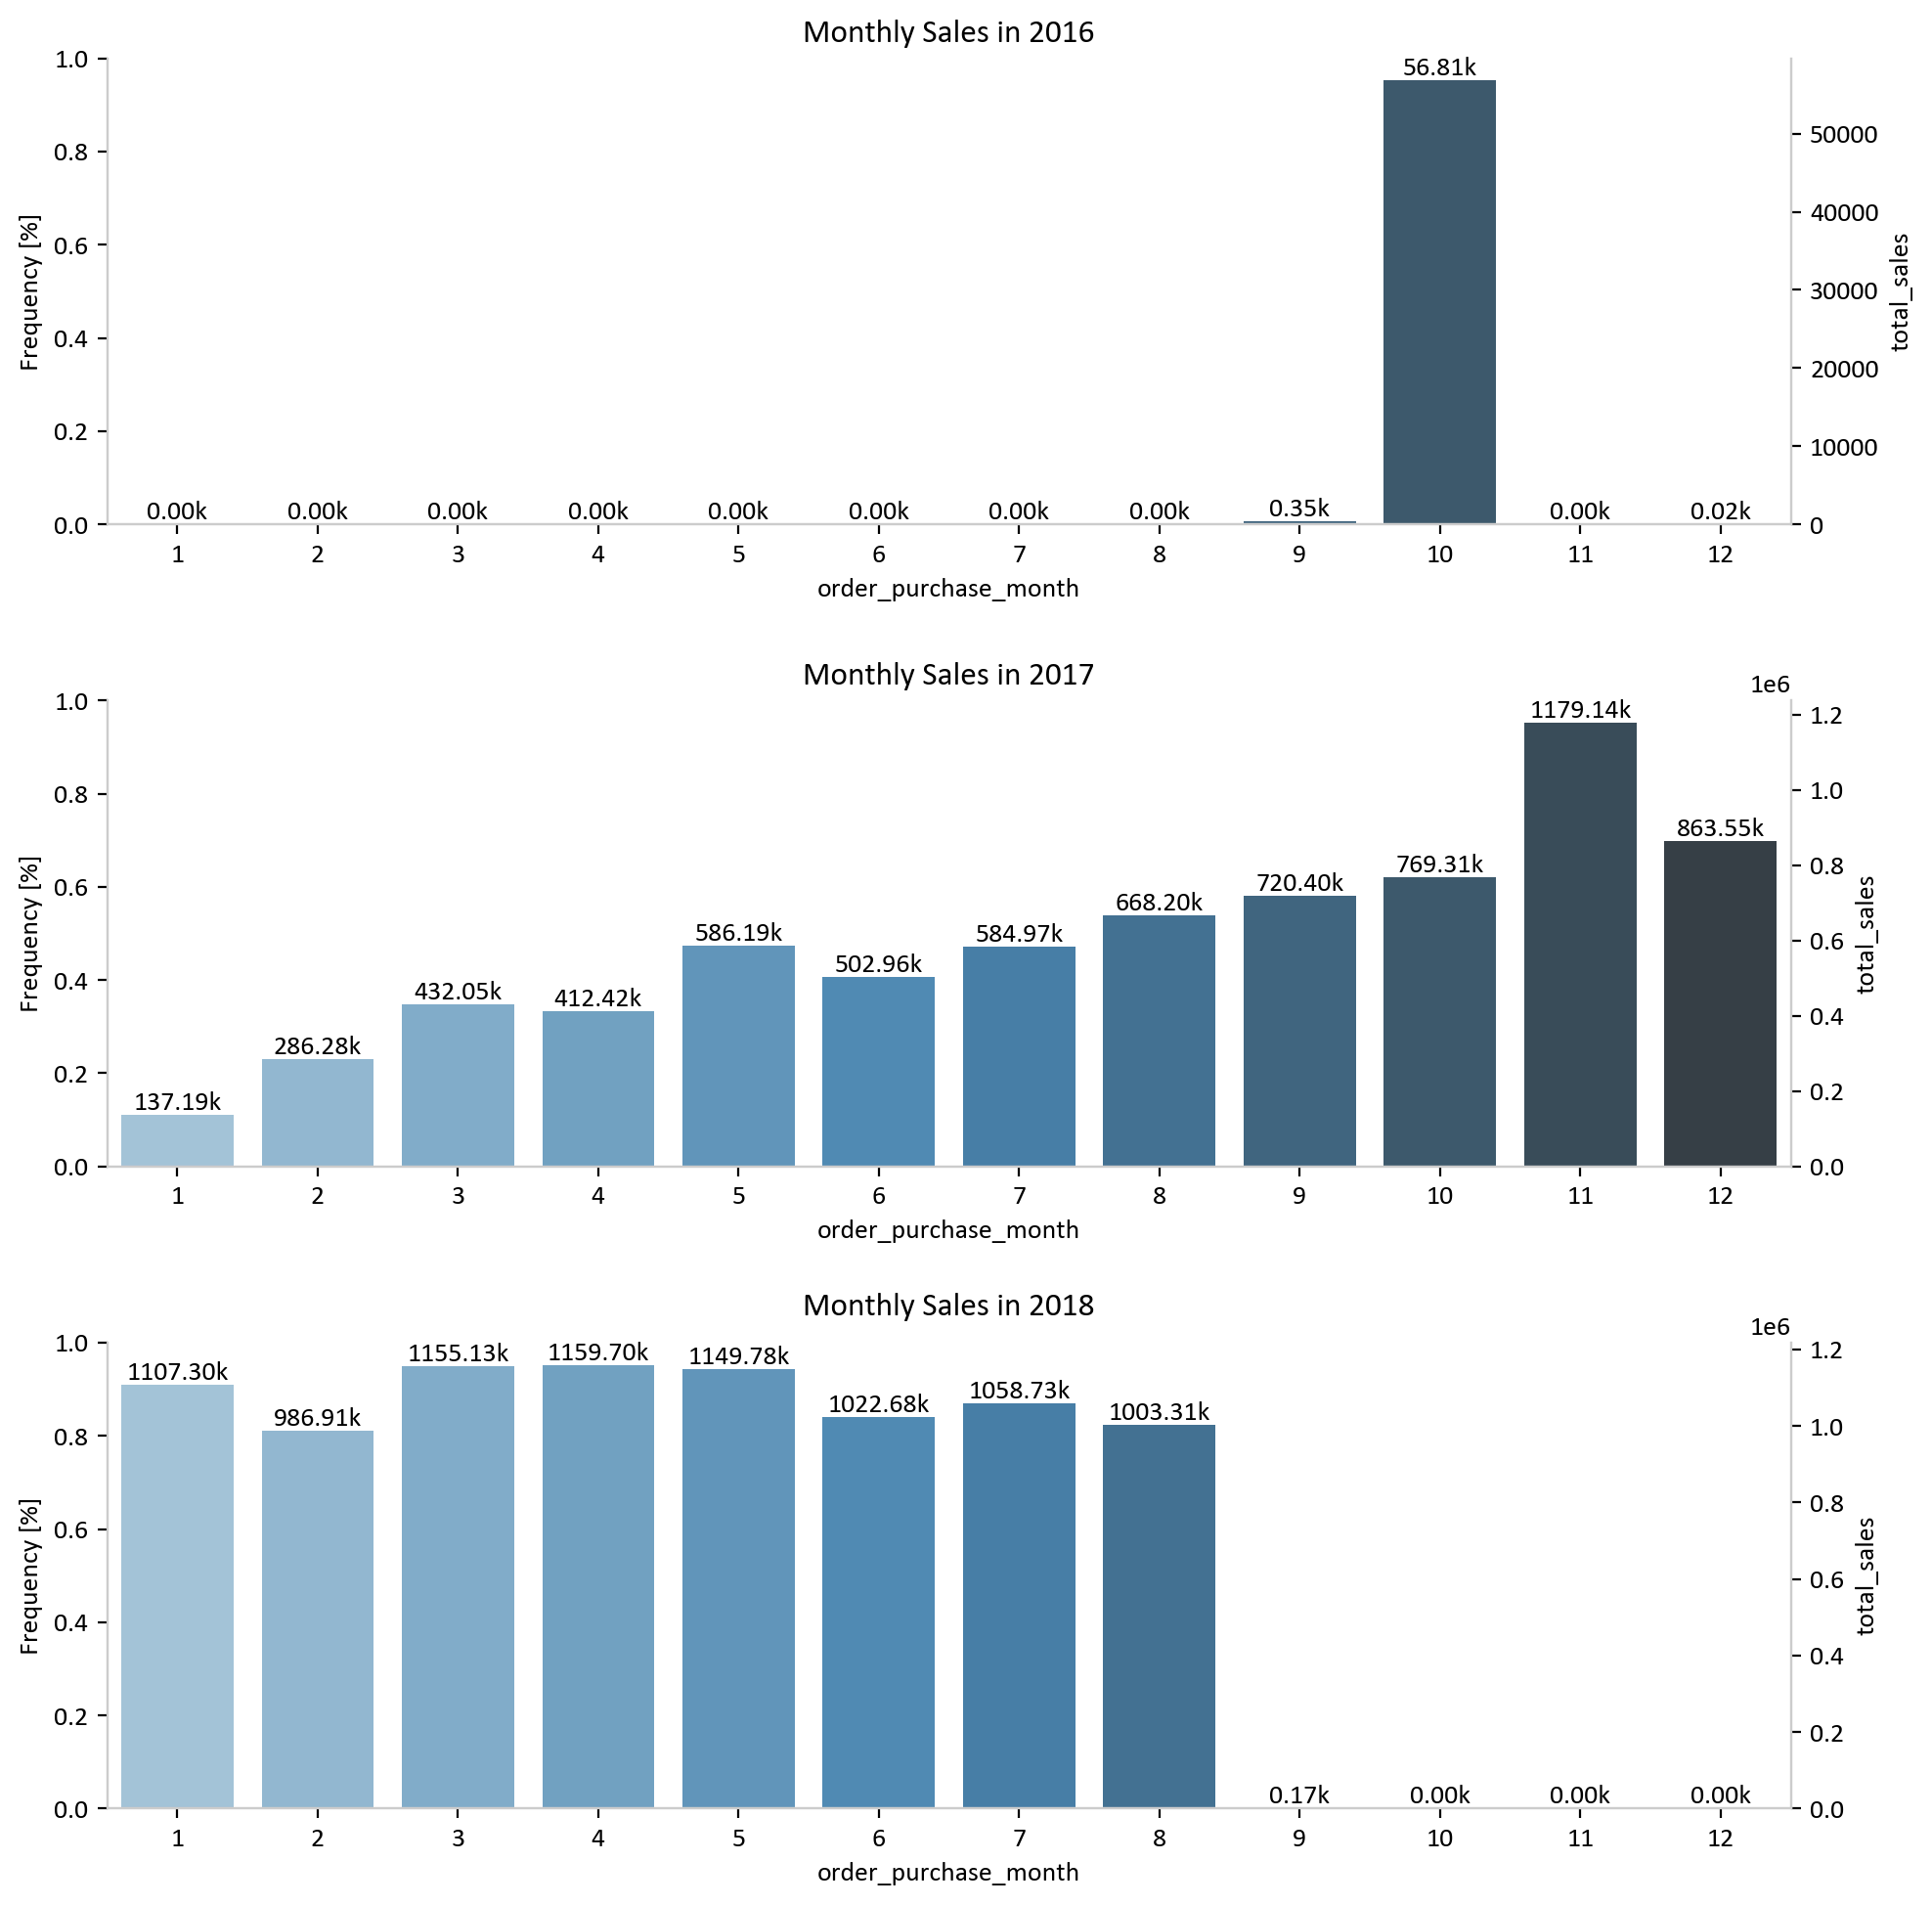

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2018, ax=axs[2], value=True)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018', pad=10)
plt.show()

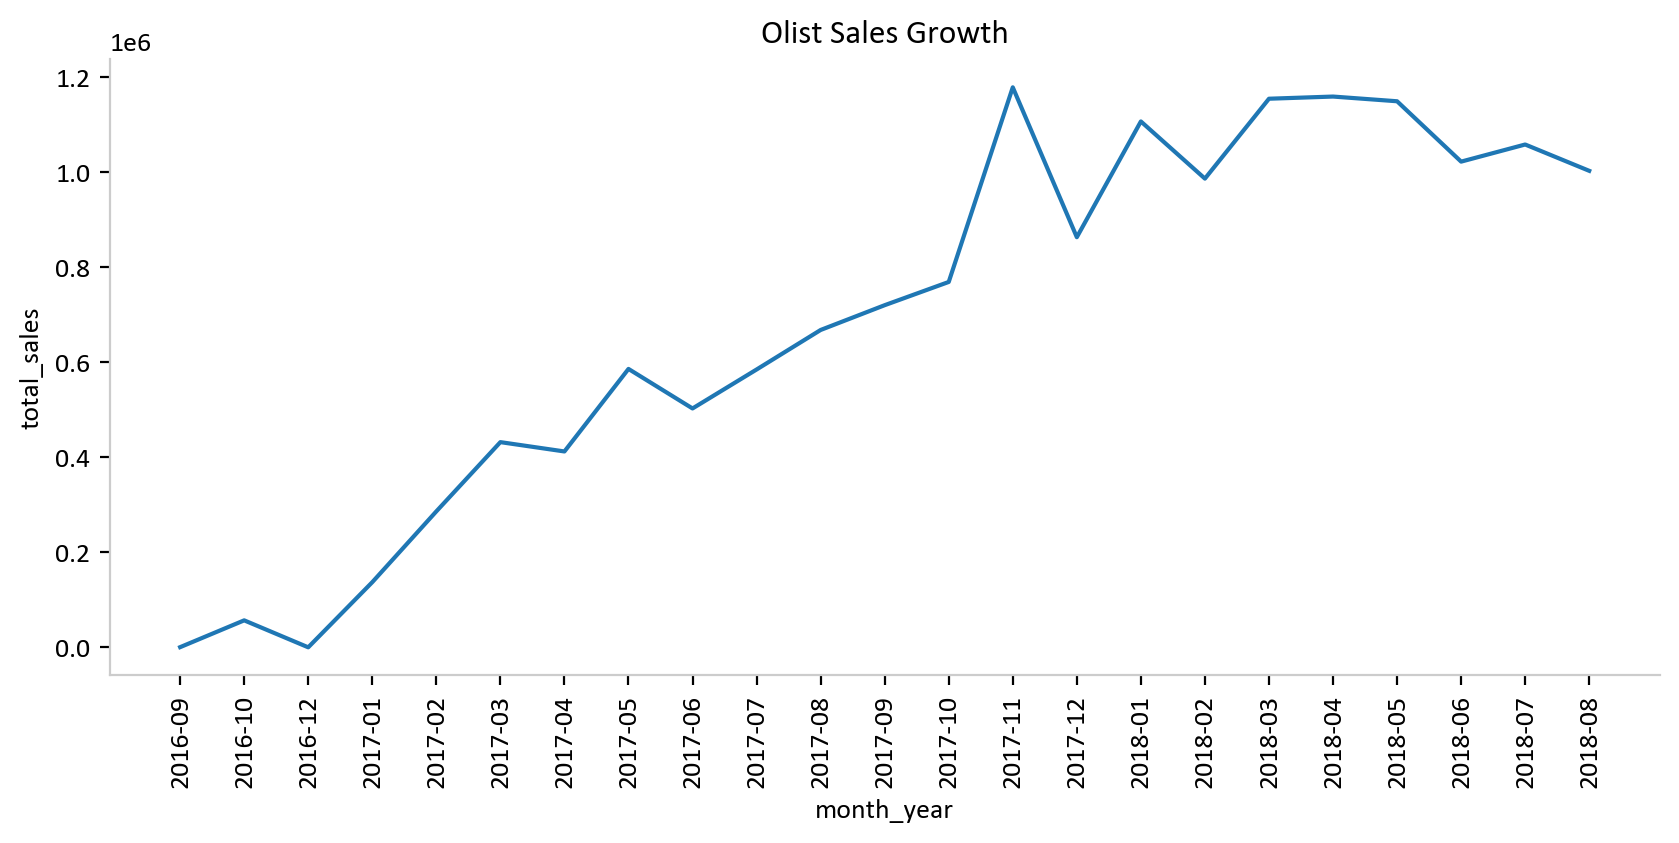

In [14]:
# Changing the month attribute for correct ordenation
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + \
df_sales['order_purchase_month'].astype(str)
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Olist Sales Growth')
plt.show()

Grafik ini menunjukkan bahwa sales Olist menunjukkan peningkatan seiring waktu

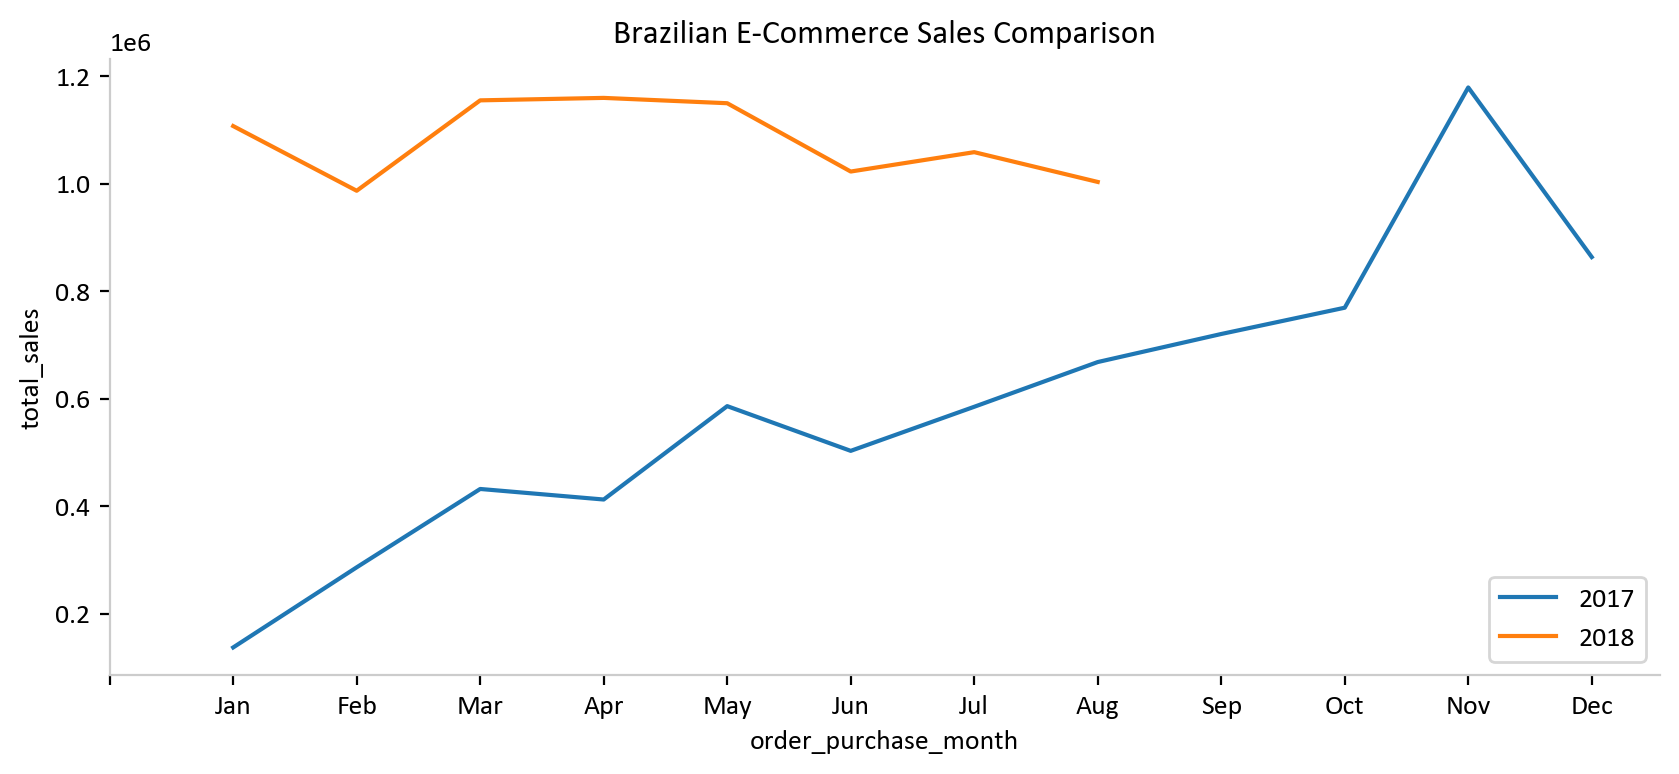

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='total_sales', 
                  data=df_sales_2018.iloc[:-4, :], label='2018')
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Sales Comparison')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])
plt.show()


## State

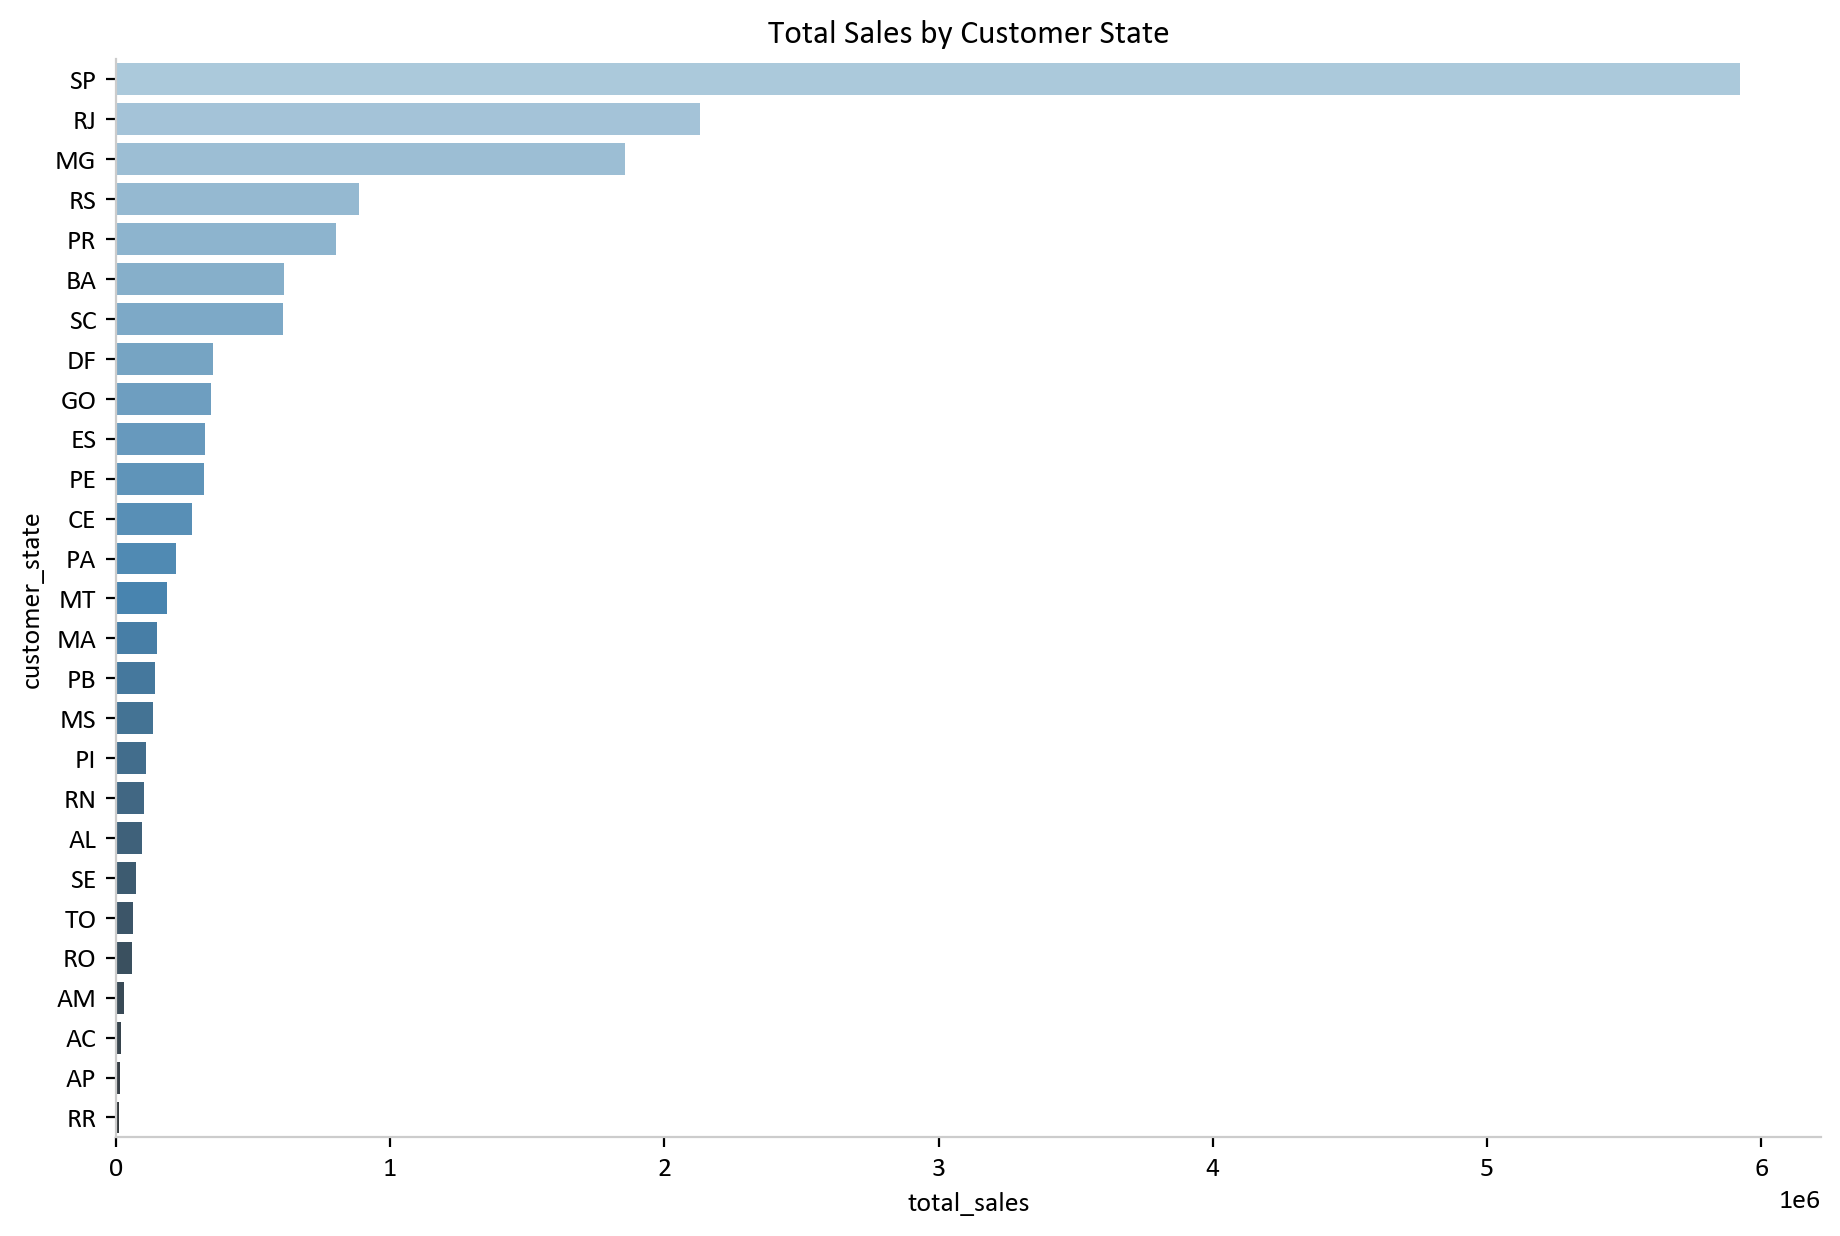

In [16]:
# Merging customer dataset
df_sales_customer = df_orders_items.merge(df_customers, on='customer_id', how='inner')

# Grouping by customer state
df_sales_state = df_sales_customer.groupby(['customer_state'], 
                                          as_index=False).agg({'total_sales': 'sum', 'freight_value': 'sum'})

df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize = (11, 7))
sns.barplot(x='total_sales', y='customer_state', data= df_sales_state, palette='Blues_d')

format_spines(ax, right_border=False)
ax.set_title('Total Sales by Customer State')

plt.show()



SP(sao paulo), RJ(rio de janeiro), MG(santa barbara), RS(novo hamburgo), PR(sao jose dos pinhais), BA(cruz das almas), SC(jaragua do sul) adalah kota - kota dengan total penjualan tertinggi. 

## Delivery

In [17]:
# Calculate Delivery time
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')
# Grouping by customer state
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).agg({'time_to_delivery':'mean'})

In [18]:
# Computing working days between delivery and estimated time
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')

# Grouping by customer state
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).agg({'diff_est_deliv':'mean'})

df_diff_est_deliv = df_diff_est_deliv.loc[:, ['customer_state', 'diff_est_deliv']]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)


In [19]:
# Computing freight value and mean values
df_mean_freight = df_sales_customer.groupby(['customer_state'], 
                                as_index=False).agg({'total_sales':'mean','freight_value':'mean'})



mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

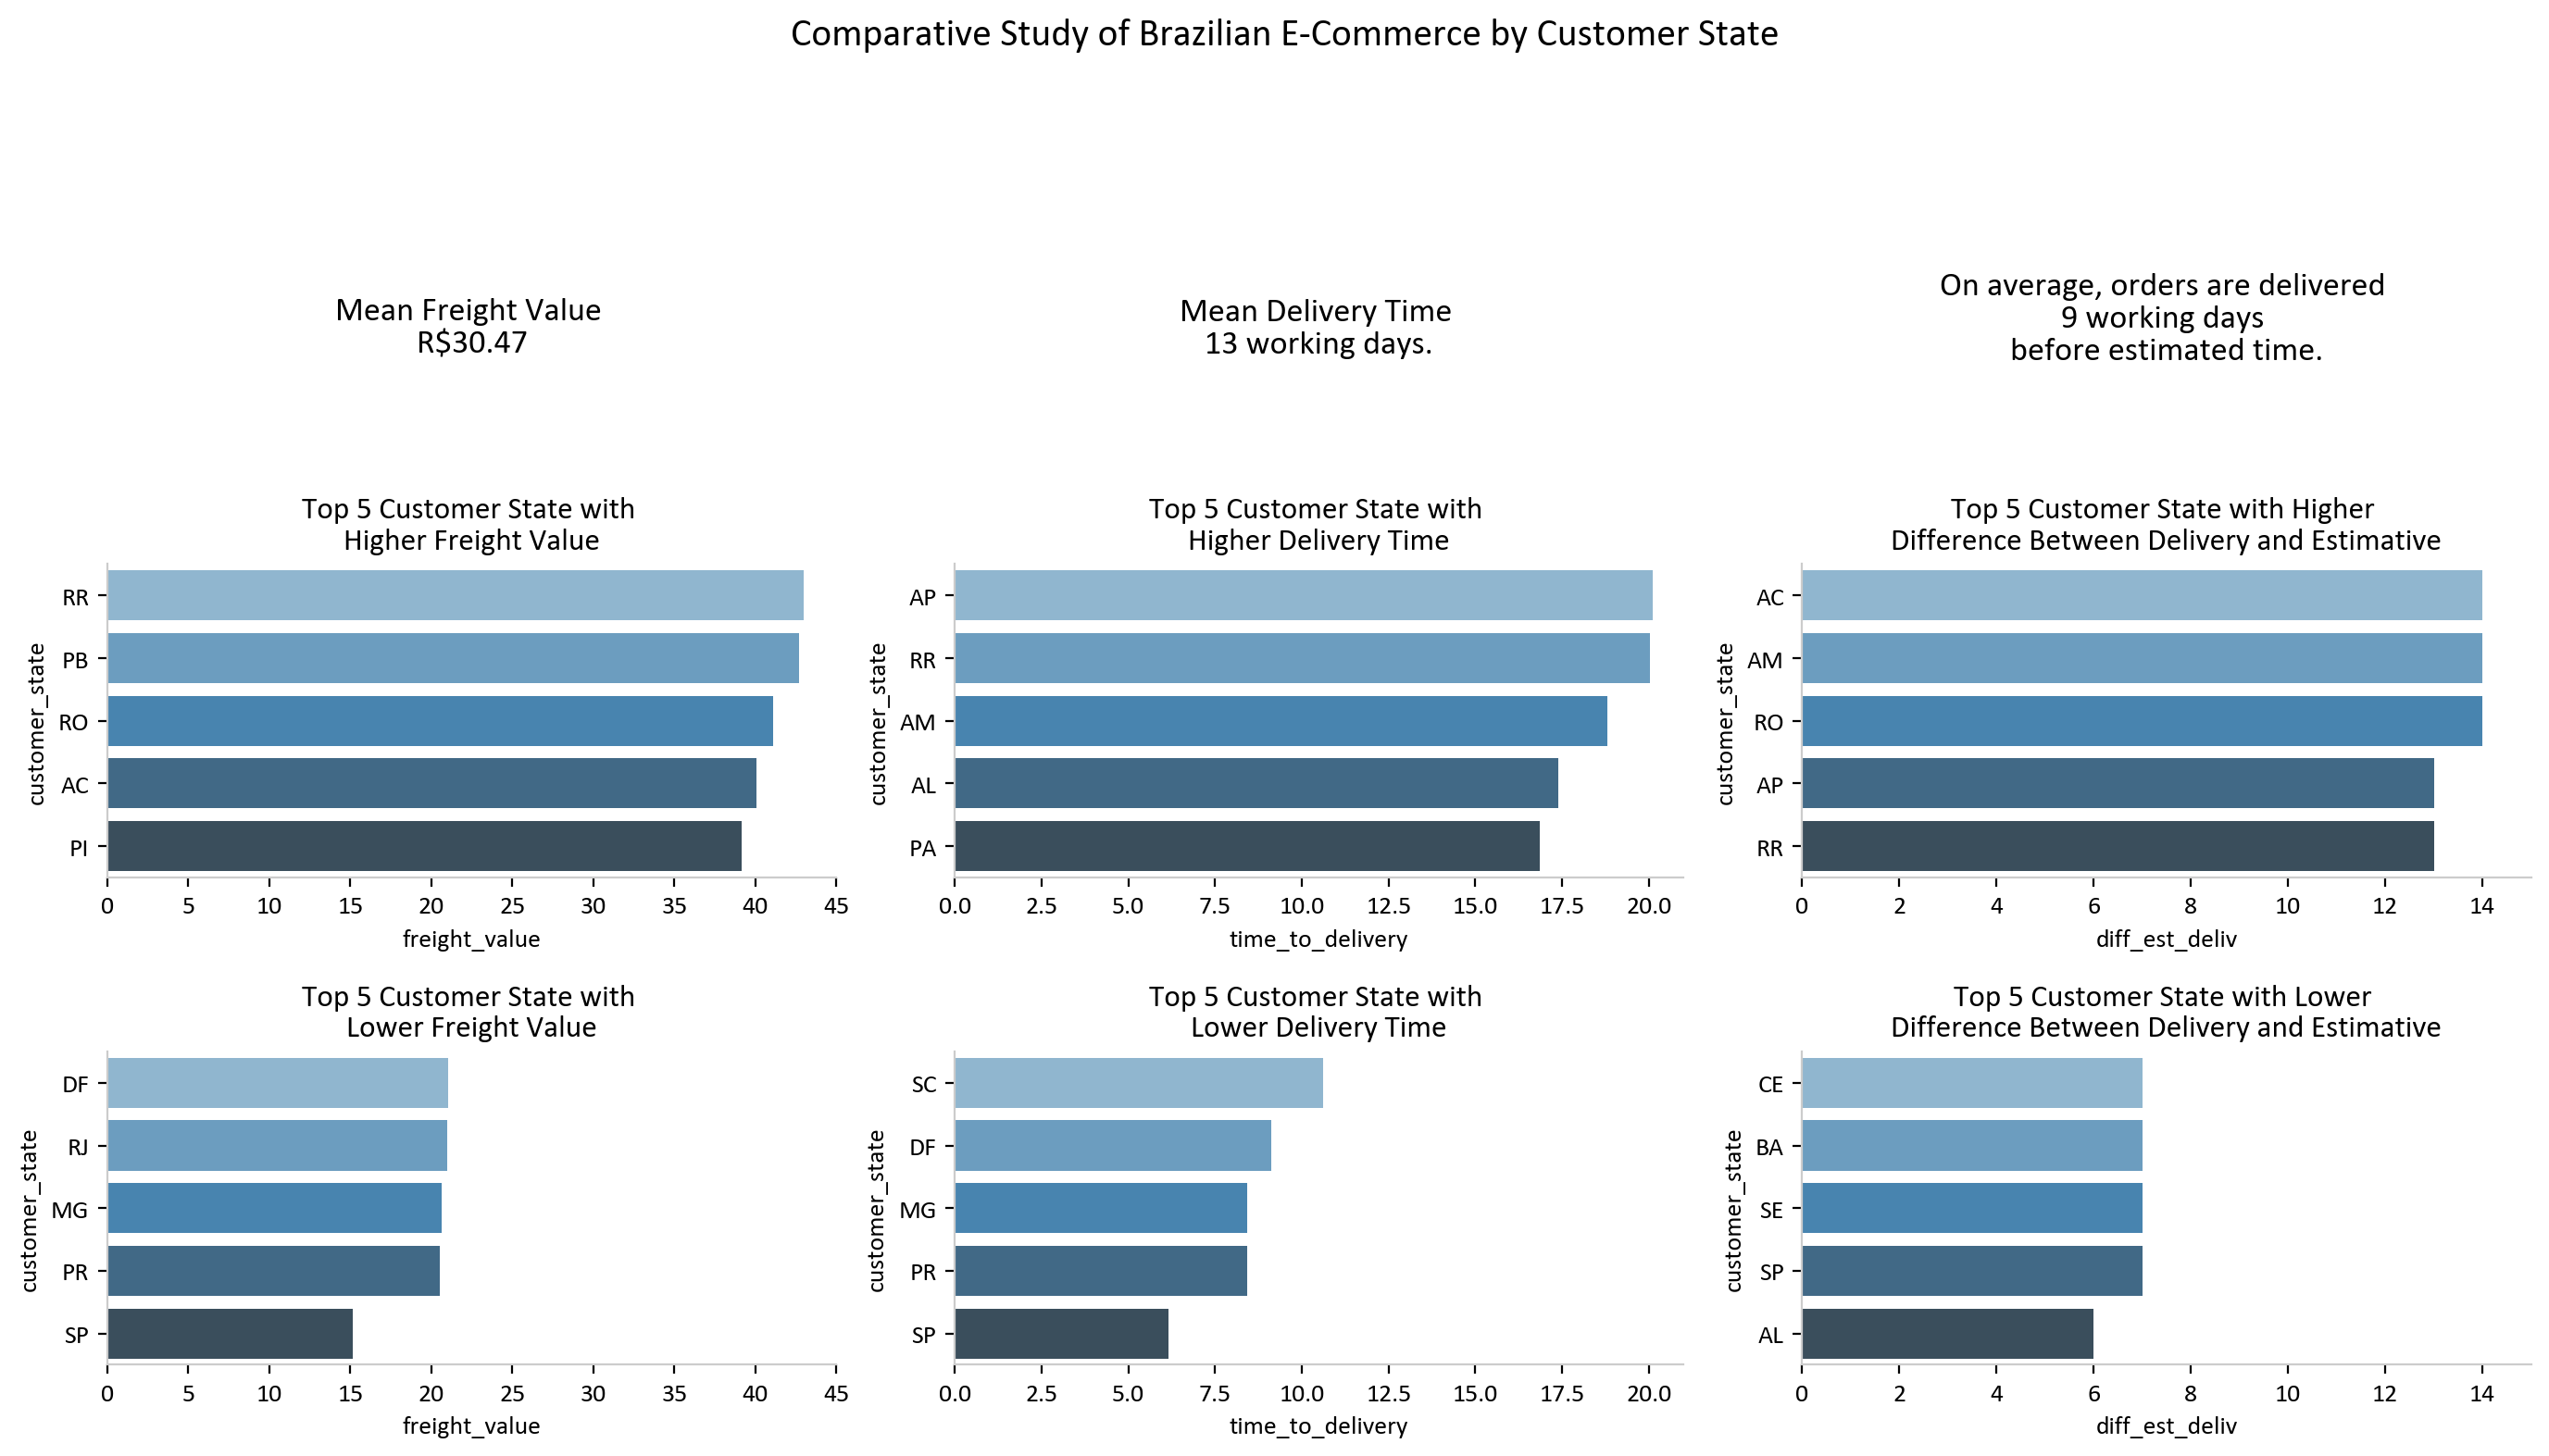

In [20]:
# Plot
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Plot Freight Value
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 Customer State with \nHigher Freight Value', xlim=45, n_row=1, n_col=0)

# Plot Delivery Time
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 Customer State with \nHigher Delivery Time', xlim=21, n_row=1, n_col=1)

# Plot Differece between delivery time and estimate time
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 Customer State with Higher \nDifference Between Delivery and Estimative', 
           xlim=15, n_row=1, n_col=2)

plt.suptitle('Comparative Study of Brazilian E-Commerce by Customer State', size=15)
plt.tight_layout()
plt.show()

- Hasil Nilai Pengiriman (freight value)
    - 5 Kota dengan Nilai Pengiriman Tertinggi: PR, PB, RO, AC, PI
    - 5 Kota dengan Nilai Pengiriman Terendah: DF, RJ, MG, PR, SP

- Hasil Waktu Pengiriman (delivery time)
    - 5 Kota dengan Waktu Pengiriman Tertinggi: AP, RR, AM, AL, PA
    - 5 Kota dengan Waktu Pengiriman Terendah: SC, DF, MG, PR, SP

- Hasil selisih antara waktu aktual pengiriman dengan tanggal estimasi pengiriman:
    - 5 Kota dengan Perbedaan Waktu Tertinggi antara Pengiriman dan Estimasi: AC, AM, RO, AP, RR
    - 5 Kota dengan Perbedaan Waktu Terendah antara Pengiriman dan Estimasi: CE, BA, SE, SP, AL

## Payment Type

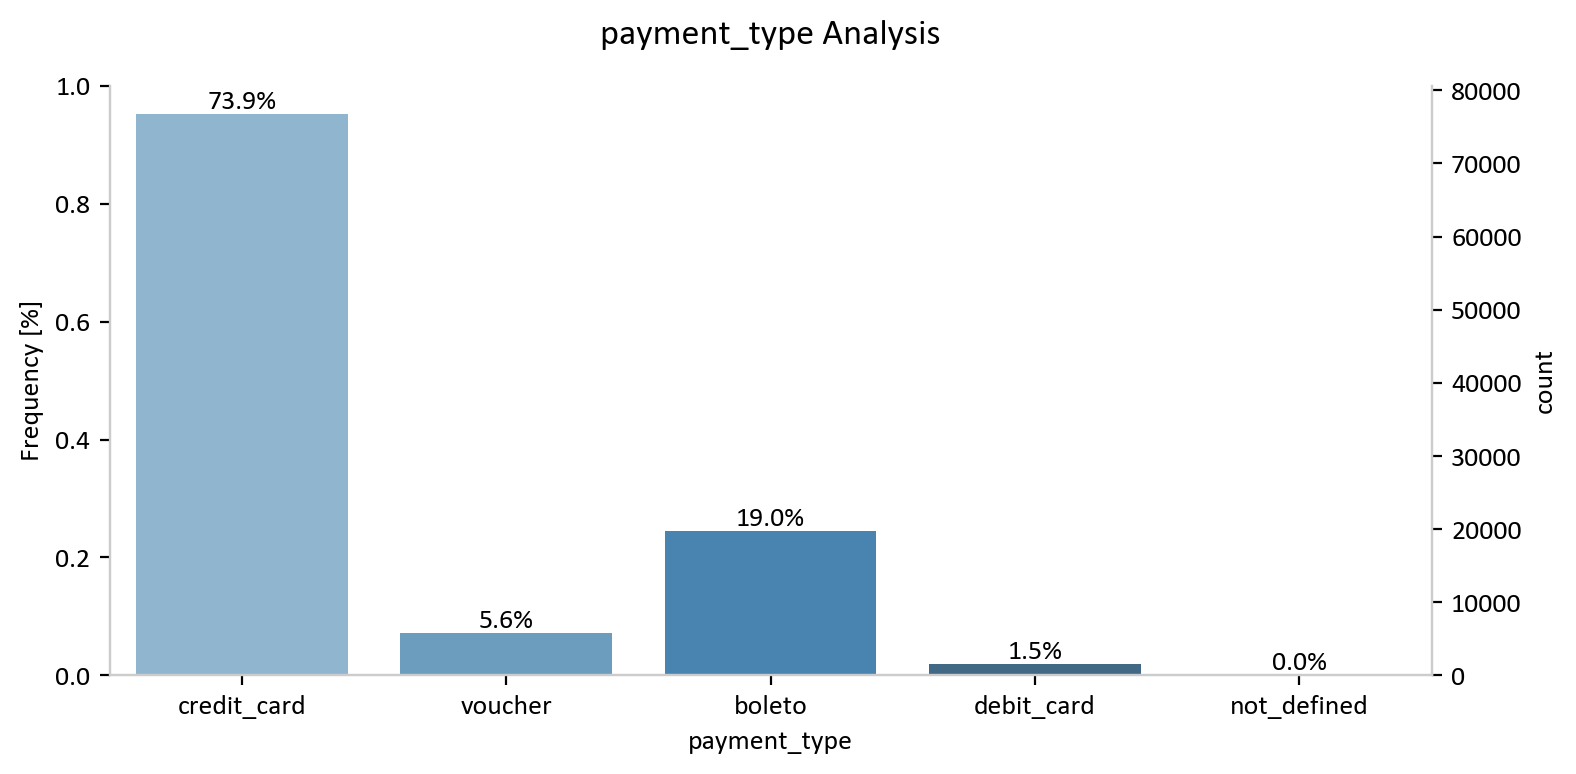

In [21]:
# Merging dataset with payment information
df_sales_payments = df_orders.merge(df_payments, on='order_id', how='inner')

fig, ax = plt.subplots(figsize=(8, 4))
count_plot(feature='payment_type', df=df_sales_payments)

Mayoritas transaksi di Olist dibayarkan dengan menggunakan kartu kredit.

## Product Categories

In [22]:
# Merging data
df_order_products = df_orders_items.merge(df_products, on='product_id', how='inner')
df_order_products['product_category_name'] = df_order_products['product_category_name'].fillna('others')


# Sales counting
df_qtd_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).agg({'total_sales':'count'})


# Total sales
df_sales_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).agg({'total_sales':'sum'})


# Mean amount per product category
df_mean_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).agg({'total_sales':'mean'})

In [23]:
df_order_products

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,...,freight_value,total_sales,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,8.72,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2017,8,...,7.78,37.77,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,2017,8,...,7.78,37.77,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,2017,10,...,14.10,44.09,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,22.76,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,2017,8,...,18.12,374.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,2017,8,...,18.12,374.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,2017,12,...,15.14,71.04,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,...,13.08,85.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


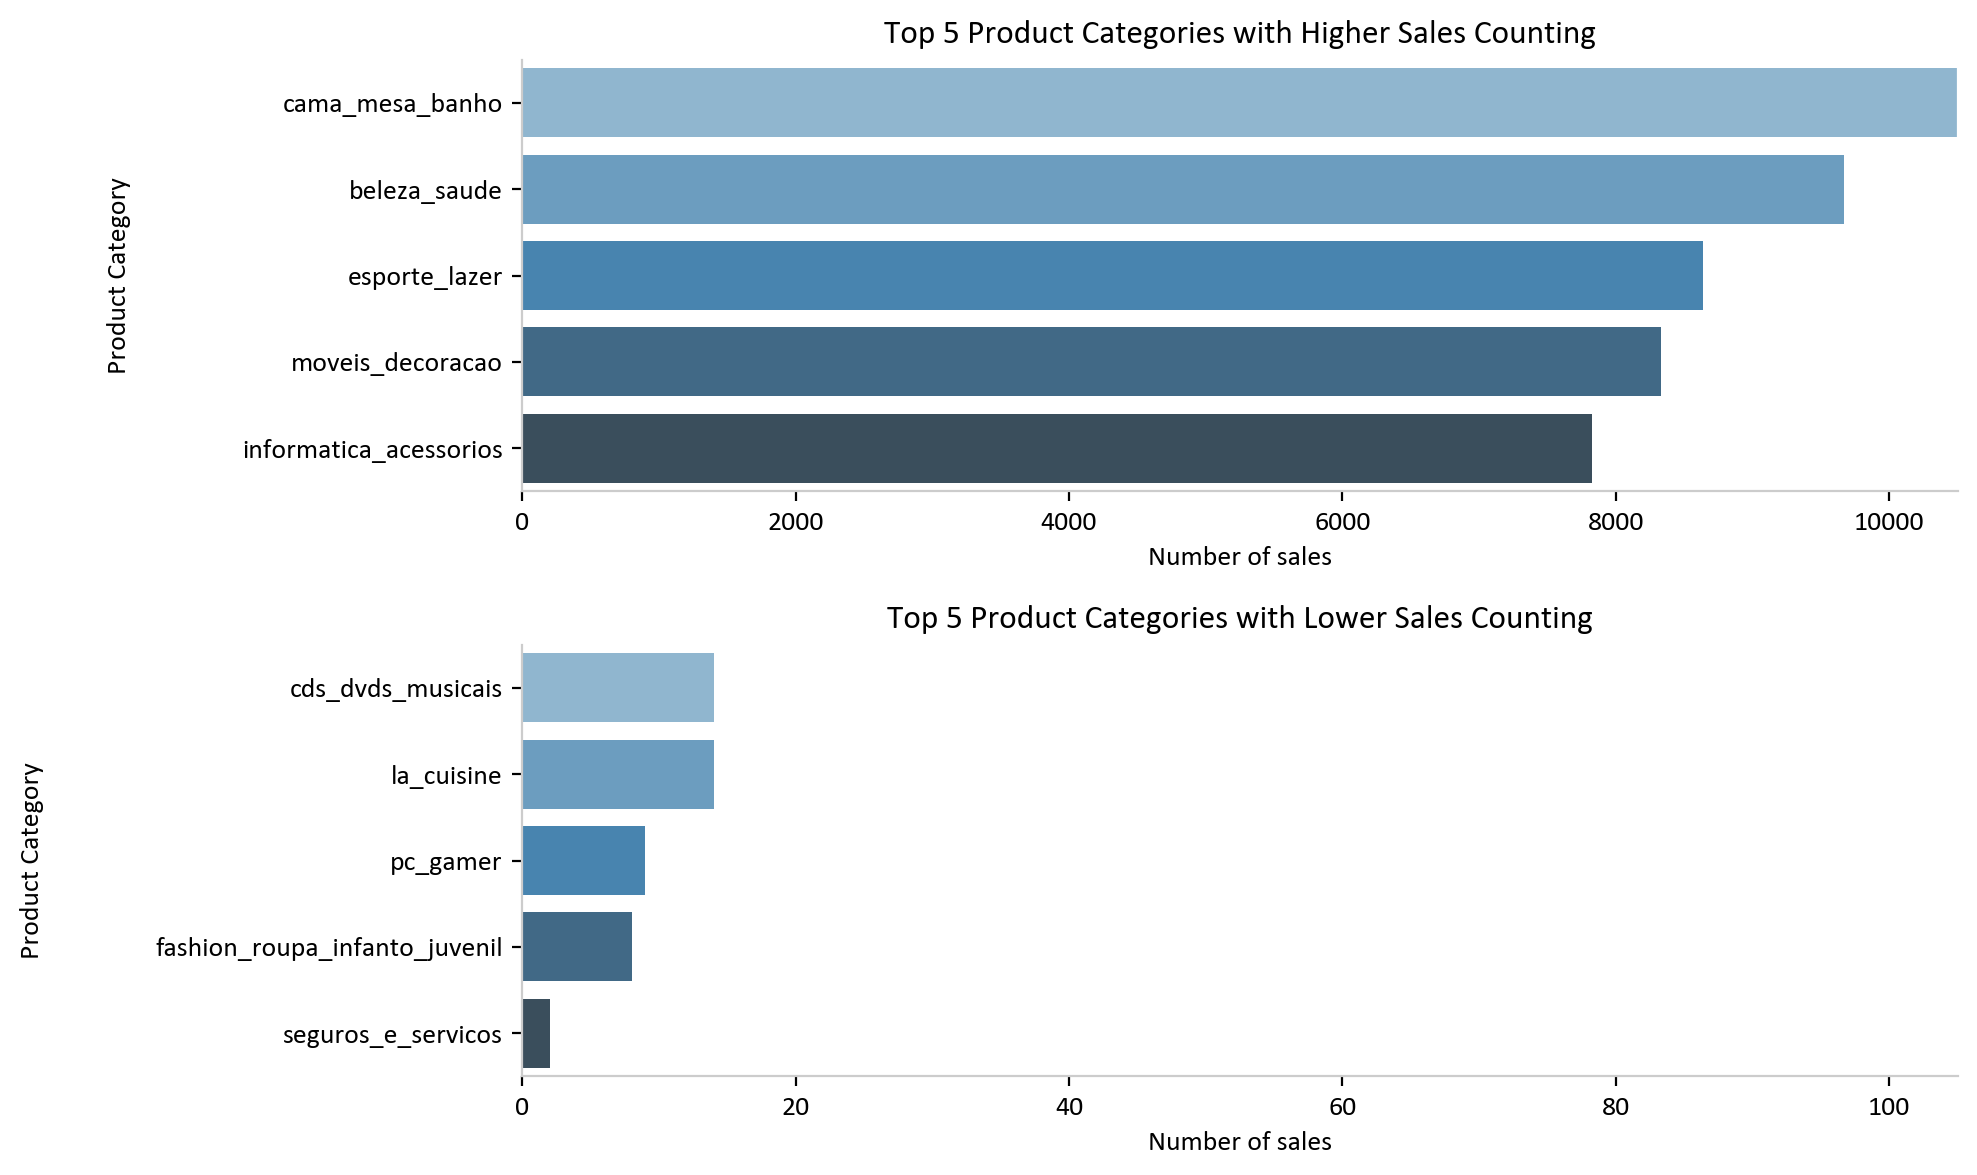

In [24]:
# Sales counting
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_qtd_product, col='total_sales', 
           title='Top 5 Product Categories with Higher Sales Counting',
           xlim=10500, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('Number of sales')
axs[0].set_xlabel('Number of sales')
axs[0].set_ylabel('Product Category', labelpad=40)
axs[1].set_ylabel('Product Category', labelpad=40)
plt.tight_layout()
plt.show()

Kategori produk dengan jumlah transaksi terbanyak yaitu pada kategori `bed_bath_table`, `health_beauty`, dan `sports_leisure`

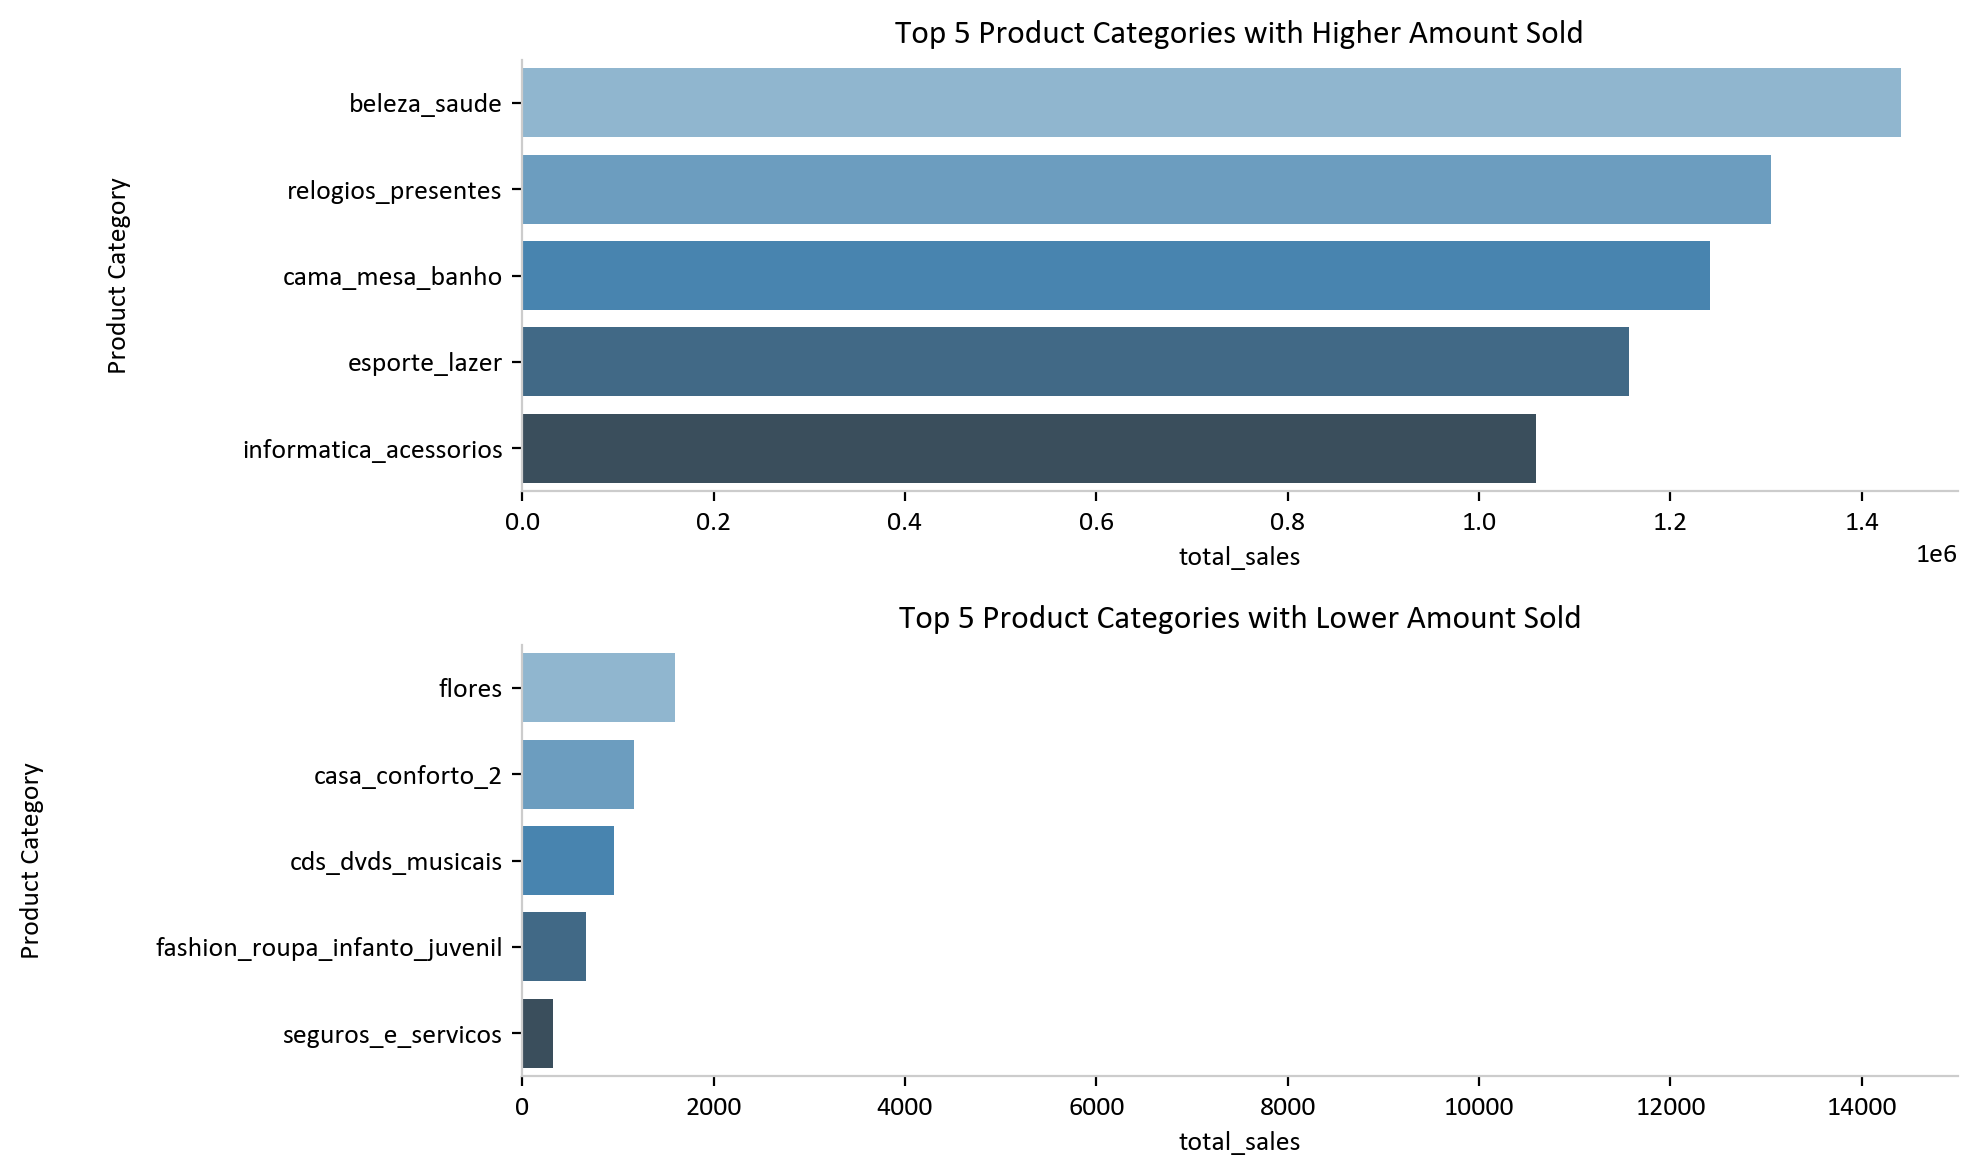

In [25]:
# Total amount of sales by product
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_sales_product, col='total_sales', 
           title='Top 5 Product Categories with Higher Amount Sold',
           xlim=1500000, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[0].set_ylabel('Product Category', labelpad=40)
axs[1].set_ylabel('Product Category', labelpad=40)
plt.tight_layout()
plt.show()

Kategori produk dengan total penjualan terbanyak yaitu pada kategori `health_beauty`, `watches_gifts`, dan `bed_bath_table`

## Reviews

In [26]:
# Merging datasets
df_ord_prod_cust = df_order_products.merge(df_customers, on='customer_id', how='inner')
df_info_reviews = df_ord_prod_cust.merge(df_reviews, on='order_id', how='inner')
idx_columns = ['order_id', 'order_purchase_year', 'total_sales',
               'product_category_name', 'customer_city', 'customer_state',
               'review_score']
df_info_reviews = df_info_reviews.loc[:, idx_columns]

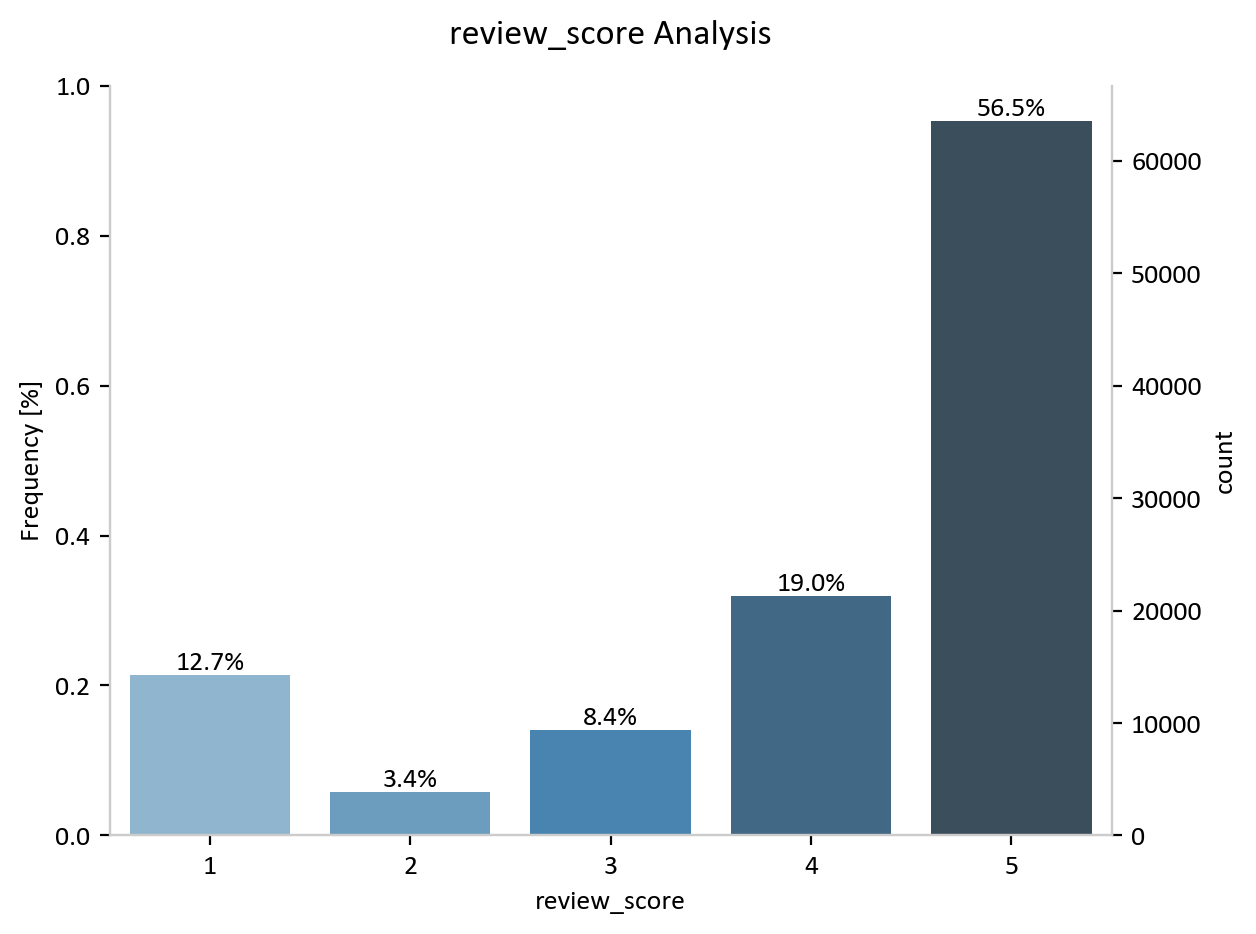

In [27]:
# Score counting
count_plot(feature='review_score', df=df_info_reviews)
plt.show()

Kebanyakan pelanggan memberikan skor 5 dimana skala yang digunakan adalah 1 (sangat tidak puas) dan 5 (sangat puas). Namun terdapat 12.7% pelanggan yang memberikan skor 1. Penyebab skor 1 dapat dicaritahu lebih dalam agar dapat mengetahui aspek yang dapat dievaluasi oleh perusahaan agar dapat meningkatkan kepuasan pelanggan.

In [28]:
# Mean review score
mean_review_score = df_info_reviews['review_score'].mean()
print(f'Mean customer review score: {mean_review_score:.2f}')

Mean customer review score: 4.03


In [29]:
# Grouping by customer state
df_state_review = df_info_reviews.groupby(['customer_state'], as_index=False).agg({'review_score':'mean'})
df_state_review.sort_values('review_score', ascending=False, inplace=True)


# Grouping by product category
df_product_review = df_info_reviews.groupby(['product_category_name'], as_index=False).agg({'review_score':'mean'})
df_product_review.sort_values('review_score', ascending=False, inplace=True)

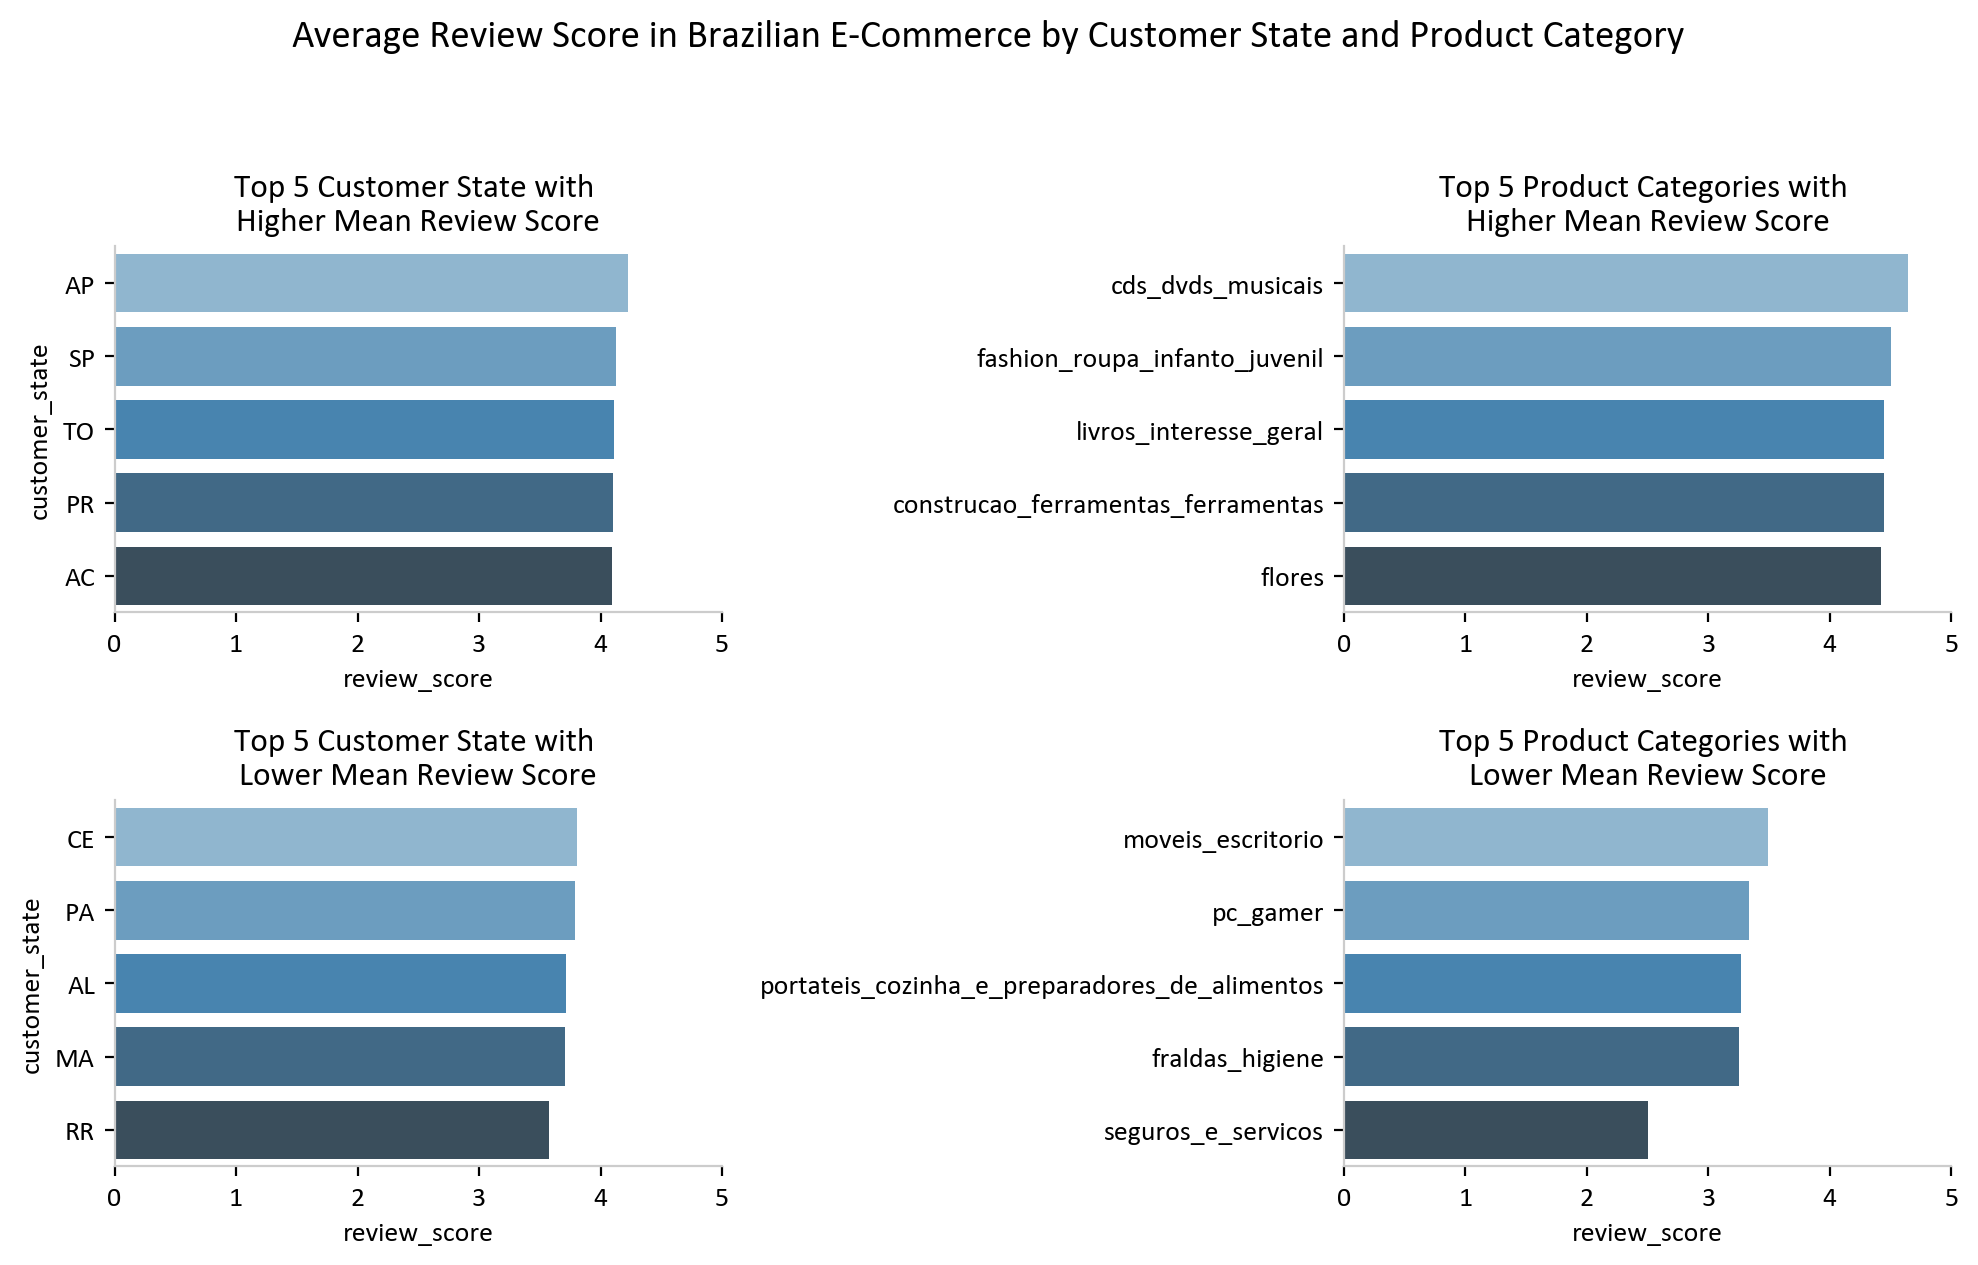

In [30]:
# Plotting data
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plot_param(df=df_state_review, col='review_score', y='customer_state',
           title='Top 5 Customer State with \nHigher Mean Review Score', xlim=5, n_row=0, n_col=0)
plot_param(df=df_product_review, col='review_score', y='product_category_name',
           title='Top 5 Product Categories with \nHigher Mean Review Score', xlim=5, 
           n_row=0, n_col=1)
axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')

plt.suptitle('Average Review Score in Brazilian E-Commerce by Customer State and Product Category', 
             y=1.05, size=14)
plt.tight_layout()
plt.show()

5 Customer State dengan rata - rata review score terendah : 
BA, PA, AL, MA, RR

Kemungkinan alasan mereka memberikan review score rendah :
- PA -> Long delivery time
- AL -> Long delivery time
- RR -> Long delivery time, difference between delivery and estimative is long
    
Dapat ditrack lebih dalam kenapa customer tersebut memberikan review rendah pada bagian review comments analysis.

Dari kumpulan data penjualan Olist selama 3 tahun dan EDA yang dilakukan pada berbagai metrik bisnis di atas, berikut adalah wawasan yang ditarik:
- Olist telah melihat peningkatan pendapatan yang konsisten selama beberapa tahun terakhir
- Bed_bath_table adalah kategori produk paling populer berdasarkan jumlah pesanan yang dibuat, diikuti oleh health_beauty dan sports_leisure.
- Jenis pembayaran yang paling sering digunakan oleh pelanggan Olist adalah kartu kredit yang menyumbang 74,3% dari total pembayaran, diikuti oleh boleto sebesar 19,16%.